# Step1 Camera Caliburation

In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pmimg
from pathlib import Path

In [2]:
image_folder_name = './camera_cal/'
image_folder_path = Path(image_folder_name)
all_image_path = [str(path.absolute()) for path in image_folder_path.glob('*.jpg')]

nx = 9
ny = 6

In [3]:
objp = np.zeros((nx*ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:ny, 0:nx].T.reshape(-1, 2)

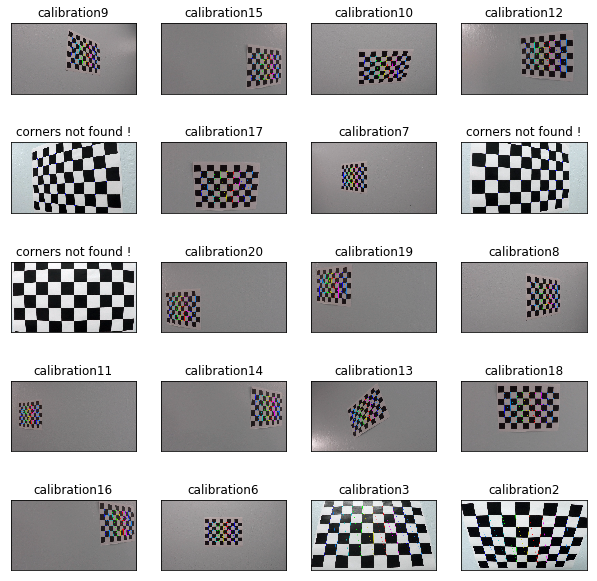

In [4]:
objpoints = []
imgpoints = []

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 8))
for index, path in enumerate(all_image_path):
    
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (ny, nx), None)
    img_plot = cv2.drawChessboardCorners(img.copy(), (ny, nx), corners, ret)
    
    x_index = index % 4
    y_index = index // 4
    
    axes[y_index, x_index].imshow(img_plot)
    axes[y_index, x_index].set_xticks([])
    axes[y_index, x_index].set_yticks([])
    
    if ret:
        axes[y_index, x_index].set_title(path.split('/')[-1].split('.')[0])
    else:
        axes[y_index, x_index].set_title('corners not found !')
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    if ret:
        corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        
        objpoints.append(objp)
        imgpoints.append(corners)

Text(0.5,1,'undistorted image: ')

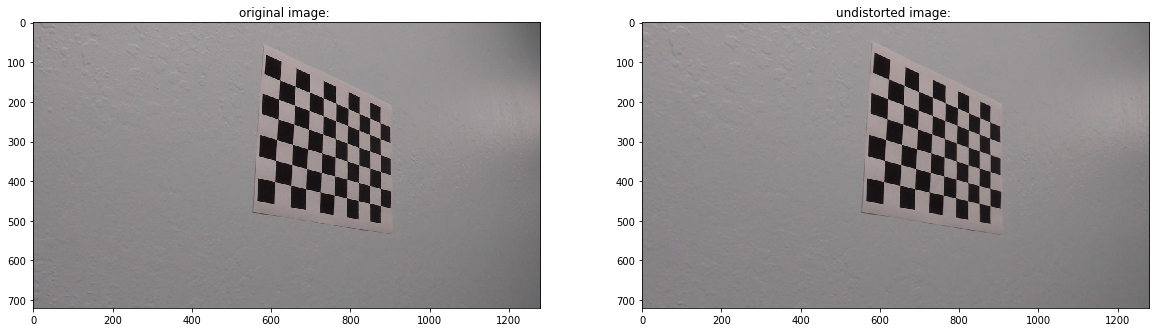

In [5]:
img = cv2.imread(all_image_path[0])
im_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = \
    cv2.calibrateCamera(objpoints, imgpoints, im_size, None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img)
axes[0].set_title('original image: ')
axes[1].imshow(dst)
axes[1].set_title('undistorted image: ')

In [6]:
sample_img = cv2.imread(all_image_path[0])
im_size = (sample_img.shape[1], sample_img.shape[0])

alpha_scaling_factor = 0

In [7]:
ret, mtx, dist, rvecs, tvecs  = \
    cv2.calibrateCamera(objpoints, imgpoints, im_size, None, None)

In [8]:
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, im_size, 
                                                  alpha_scaling_factor, im_size)

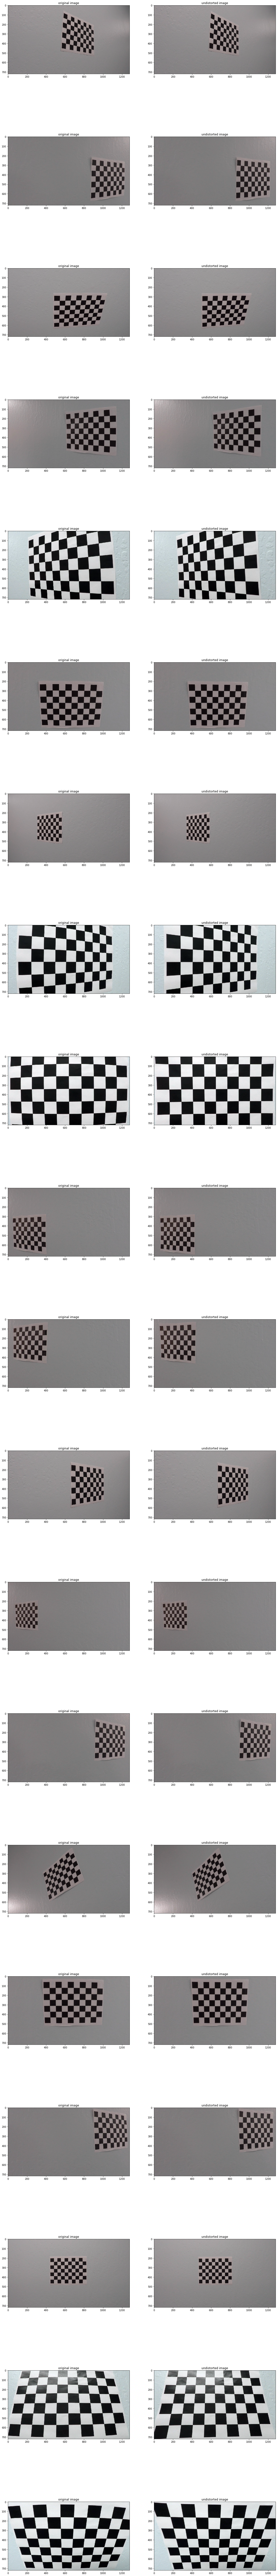

In [9]:
fig, axes = plt.subplots(len(all_image_path), 2, figsize=(20, 10*len(all_image_path)))
for index, path in enumerate(all_image_path):
    img = cv2.imread(path)
    im_size = (img.shape[1], img.shape[0])
    
    ret, mtx, dist, rvecs, tvecs  = \
        cv2.calibrateCamera(objpoints, imgpoints, im_size, None, None)
    
    try:
        dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    except NameError:
        newcameramtx = mtx
        dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    
    axes[index, 0].imshow(img)
    axes[index, 0].set_title('original image')
    axes[index, 1].imshow(dst)
    axes[index, 1].set_title('undistorted image')

In [10]:
data = {
    'mtx': mtx,
    'dist': dist,
    'newcameramtx': newcameramtx,
    'roi': roi
}

with open('experimental/data.pickle', 'wb') as f:
    pickle.dump(data, f)

## For WriteUp

In [18]:
out = './output_images/'

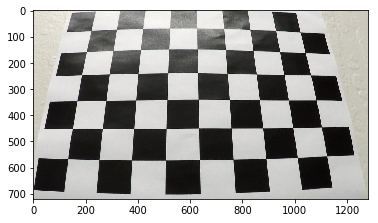

In [19]:
img = cv2.imread('./camera_cal/calibration3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.savefig(out + 'original_chessboard.png')

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (ny, nx), None)
img_plot = cv2.drawChessboardCorners(img.copy(), (ny, nx), corners, ret)

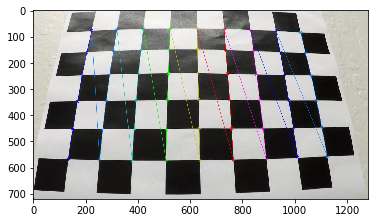

In [20]:
plt.imshow(img_plot)
plt.savefig(out + 'original_chessCorners.png')

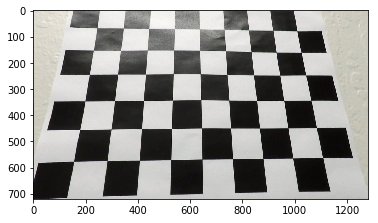

In [21]:
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
plt.imshow(dst)
plt.savefig(out + 'undistort_chessboard.png')